# Handwriting Demo

---

## Some links Mr Belser was working through

https://www.tensorflow.org/tutorials/keras/classification

https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

https://www.youtube.com/watch?v=aircAruvnKk

## All imports

In [19]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Do I have any GPUs

In [20]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Versions

In [21]:
print("Tensorflow ver :\t" + tf.__version__)
print("Numpy ver :\t\t" + np.__version__)
print("matplotlib :\t\t" + matplotlib.__version__)

Tensorflow ver :	2.7.0
Numpy ver :		1.17.4
matplotlib :		3.1.2


## Read in the data

## Describe

- X is the image
- y is the label

In [22]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

## What is the shape of the data

- `train_X` contains all 60000 of the 28x28 images 
- `train_Y` contains all 60000 clasifications of those `train_X` images 
- `test_X` contains all 10000 reserved 28x28 images for testing
- `test_Y` contains all 10000 reserved clasifications of those `test_X` images 

In [23]:
print('train_X:\t' + str(train_X.shape))
print('train_y:\t' + str(train_y.shape))
print('test_X:\t\t'  + str(test_X.shape))
print('test_y:\t\t'  + str(test_y.shape))

train_X:	(60000, 28, 28)
train_y:	(60000,)
test_X:		(10000, 28, 28)
test_y:		(10000,)


## What does an image look like?

- Data
- Display

### What do the data look like for one image

In [24]:
# print(train_X[0])

### The classifications

In [25]:
for n in range(n_show):
  print("Image " + str(n) + " is classified as a " + str(train_y[n]))

NameError: name 'n_show' is not defined

## Prepare the data for training

Need to convert the data to a domain of 0->1

In [26]:
train_X = train_X /255
test_X = test_X / 255

In [27]:
# train_X[0]

## Show a grid of images with label

### The function to _graph it_

In [28]:
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
  n_images = rows * cols
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()


### Now set the parameters

- image array
- label array
- rows
- columns
- zoom parameter

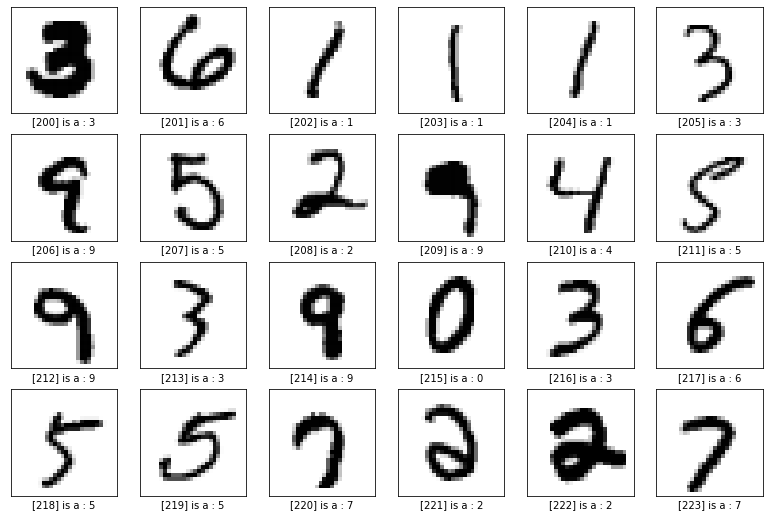

In [29]:
graphit(test_X, test_y,4,6, 200, zoom=2.25)

# Can I get a model to work?

### Attempted model from the 3 blue 1 brown video

https://www.youtube.com/watch?v=aircAruvnKk

In [30]:
## Uncomment to use it
#
# https://www.youtube.com/watch?v=aircAruvnKk
#

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])


2022-03-21 15:35:24.046032: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Train

In [33]:
# model.fit(train_X, train_y, epochs=10)
history = model.fit(train_X, train_y, epochs=10, batch_size=64)


Epoch 1/10
938/938 [==============================] - 1s 850us/step - loss: 0.3217 - accuracy: 0.9084
Epoch 2/10
938/938 [==============================] - 1s 840us/step - loss: 0.1364 - accuracy: 0.9603
Epoch 3/10
938/938 [==============================] - 1s 833us/step - loss: 0.0964 - accuracy: 0.9726
Epoch 4/10
938/938 [==============================] - 1s 836us/step - loss: 0.0734 - accuracy: 0.9776
Epoch 5/10
938/938 [==============================] - 1s 835us/step - loss: 0.0583 - accuracy: 0.9826
Epoch 6/10
938/938 [==============================] - 1s 842us/step - loss: 0.0476 - accuracy: 0.9853
Epoch 7/10
938/938 [==============================] - 1s 834us/step - loss: 0.0379 - accuracy: 0.9876
Epoch 8/10
938/938 [==============================] - 1s 833us/step - loss: 0.0302 - accuracy: 0.9903
Epoch 9/10
938/938 [==============================] - 1s 839us/step - loss: 0.0254 - accuracy: 0.9920
Epoch 10/10
938/938 [==============================] - 1s 839us/step - loss: 0.022

## look at history

looks like a dict

In [34]:
print(history.history)

{'loss': [0.3216937184333801, 0.13640619814395905, 0.09640667587518692, 0.07335259765386581, 0.05832661688327789, 0.047559212893247604, 0.037944842129945755, 0.030203407630324364, 0.02544100023806095, 0.02216007001698017], 'accuracy': [0.9083999991416931, 0.9603000283241272, 0.9725666642189026, 0.9775500297546387, 0.9825999736785889, 0.9853000044822693, 0.987583339214325, 0.9902999997138977, 0.9920499920845032, 0.992900013923645]}


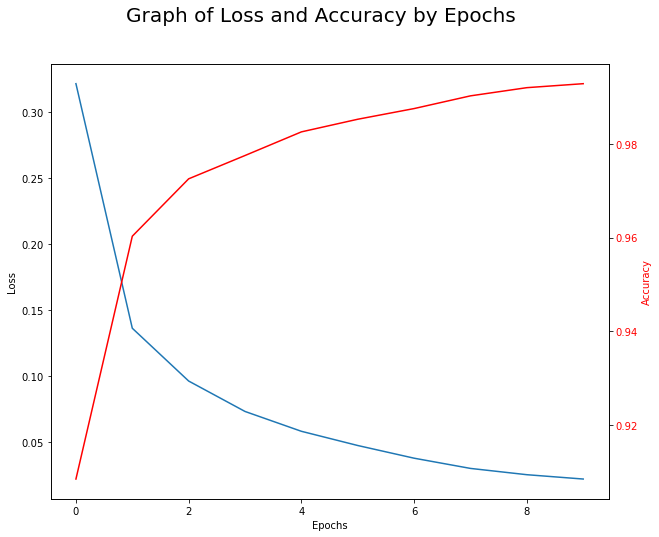

In [35]:
# list the number of epoch from the history objec
x_values = np.arange(len(history.history['loss']))

fig, ax1 = plt.subplots(figsize=(10,8)) 
fig.suptitle("Graph of Loss and Accuracy by Epochs", fontsize=20)
  
ax1.set_xlabel('Epochs') 
ax1.set_ylabel('Loss', color = 'black') 
plot_1 = ax1.plot(x_values,history.history['loss'])
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes
ax2 = ax1.twinx() 
  
ax2.set_ylabel('Accuracy', color = 'red') 
plot_2 = ax2.plot(x_values,history.history['accuracy'], color='red')
ax2.tick_params(axis ='y', labelcolor = 'red') 

# Show plot

plt.show()

---

## Evaluate the Model

### Test data that is still 28x28 images

In [36]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 663us/step - loss: 0.0799 - accuracy: 0.9775

Test accuracy: 0.9775000214576721


---

# Predictions

### 28x28 images....

In [37]:
predictions = model.predict(test_X[0:100])

### flat images

In [38]:
predictions[0]

array([  0.93189913,  -6.020722  ,   2.5768292 ,   5.4899254 ,
        -6.5891194 ,  -4.430144  , -17.646545  ,  12.343138  ,
        -1.2271199 ,   3.5266948 ], dtype=float32)

---

## Need a list of incorrect predictions

Look through the 100 predictions find where label is not the prediction

In [39]:
wrong = []
for i in range(len(predictions)):
    print(np.argmax(predictions[i]),test_y[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 4
7 7
2 2
7 7
1 1
2 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
1 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
6 6
0 0
4 4
1 1
9 9
5 5
7 7
8 8
9 9
3 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
9 9
1 1
7 7
3 3
2 2
9 9
7 7
7 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
9 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9


## Well - the first 100 are correct

So - we need to look more....

In [40]:
all_predictions = model.predict(test_X)

## Find all of the wrong classifications

In [41]:
wrong = []
for i in range(len(test_X)):
    predict = np.argmax(all_predictions[i])
    label = test_y[i]
    if(predict != label):
        # print("Found index[" + str(i) + "] to have prediction " + str(predict) + " and a label of " + str(label))
        wrong.append(i)

In [42]:
print(wrong)

[115, 247, 321, 444, 445, 582, 583, 613, 619, 691, 707, 717, 720, 810, 813, 846, 947, 951, 956, 1003, 1014, 1032, 1039, 1112, 1156, 1178, 1224, 1226, 1242, 1247, 1260, 1299, 1319, 1328, 1393, 1395, 1494, 1496, 1500, 1522, 1527, 1530, 1549, 1553, 1609, 1611, 1621, 1681, 1737, 1790, 1800, 1868, 1901, 1941, 1952, 1955, 1984, 2004, 2016, 2024, 2053, 2070, 2098, 2109, 2135, 2182, 2224, 2266, 2272, 2280, 2291, 2293, 2299, 2329, 2339, 2369, 2386, 2488, 2526, 2607, 2610, 2618, 2648, 2654, 2730, 2810, 2877, 2921, 2939, 2952, 3073, 3115, 3117, 3172, 3225, 3388, 3405, 3422, 3451, 3503, 3520, 3549, 3558, 3559, 3567, 3604, 3662, 3681, 3718, 3727, 3780, 3796, 3808, 3818, 3838, 3902, 3906, 3941, 3943, 3985, 4065, 4078, 4156, 4163, 4176, 4199, 4201, 4207, 4248, 4289, 4350, 4369, 4374, 4382, 4425, 4497, 4536, 4548, 4551, 4567, 4751, 4807, 4823, 4880, 4942, 4966, 4990, 5078, 5165, 5265, 5331, 5409, 5457, 5564, 5600, 5642, 5676, 5734, 5759, 5835, 5887, 5936, 5937, 5955, 5972, 5973, 6011, 6023, 6045, 6059

---

## Now let's see what we missed

## A simple mockup of the final graph

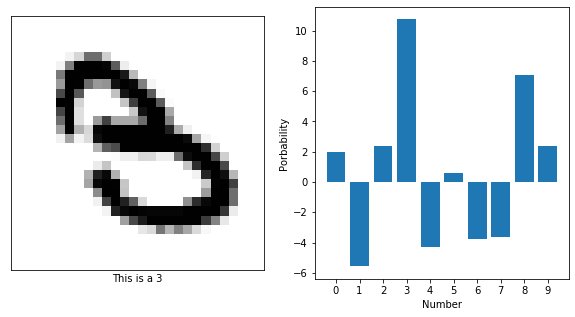

In [43]:
observation = 18
nums = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(test_X[observation], cmap=plt.cm.binary)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('This is a ' + str(test_y[observation]))
ax[1].bar(nums,all_predictions[observation])
ax[1].set_xticks(nums)
ax[1].set_xlabel('Number')
ax[1].set_ylabel('Porbability')
plt.show()


In [44]:
def plot_classified_image(ax, img, label, classification):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted = np.argmax(classification)
    if predicted == label:
        color = 'black'
    else:
        color = 'r'

    plt.xlabel("Predicted : {}  Confidence : {:2.0f}  Actual : {}".format(predicted, np.max(classification), label), color=color)
    # plt.xlabel("[zzzzz]")
    return ax

In [45]:
# may need to fix this when we have labels for the category names
def plot_prediction(ax, label, prediction):
    number_of_classes = len(prediction)
    x_values = np.arange(number_of_classes)
    predicted = np.argmax(prediction)
    ax.bar(x_values,prediction, alpha=0.75)
    ax.bar(predicted, prediction[predicted], color='r', label='prediction')
    ax.bar(label,prediction[label], color='g', label='actual')
    ax.set_xticks(x_values)
    ax.set_xlabel('Number')
    ax.set_ylabel('Porbability')
    ax.legend()

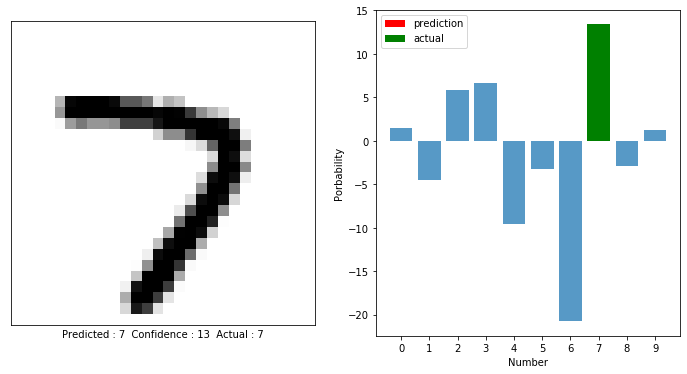

In [46]:
obs = 17

fig, ax = plt.subplots(1,2, figsize=(12,6))
plot_classified_image(plt.subplot(1,2,1), test_X[obs], test_y[obs], all_predictions[obs])
plot_prediction(plt.subplot(1,2,2), test_y[obs], all_predictions[obs])
plt.show()

In [47]:
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
    n_plots = rows * cols * 2
    fig, ax = plt.subplots(rows,cols * 2,figsize=(cols * 2 * zoom, rows * zoom))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    for n in range(n_plots):
        #plt.subplot(rows, cols * 2, n+1)
        img_index = (n // 2) + start
        if((n%2)==0):
            plot_classified_image(plt.subplot(rows, cols * 2, n+1), images[img_index], labels[img_index], predictions[img_index])
        else:
            plot_prediction(plt.subplot(rows, cols * 2, n+1), labels[img_index], predictions[img_index])
    plt.show()

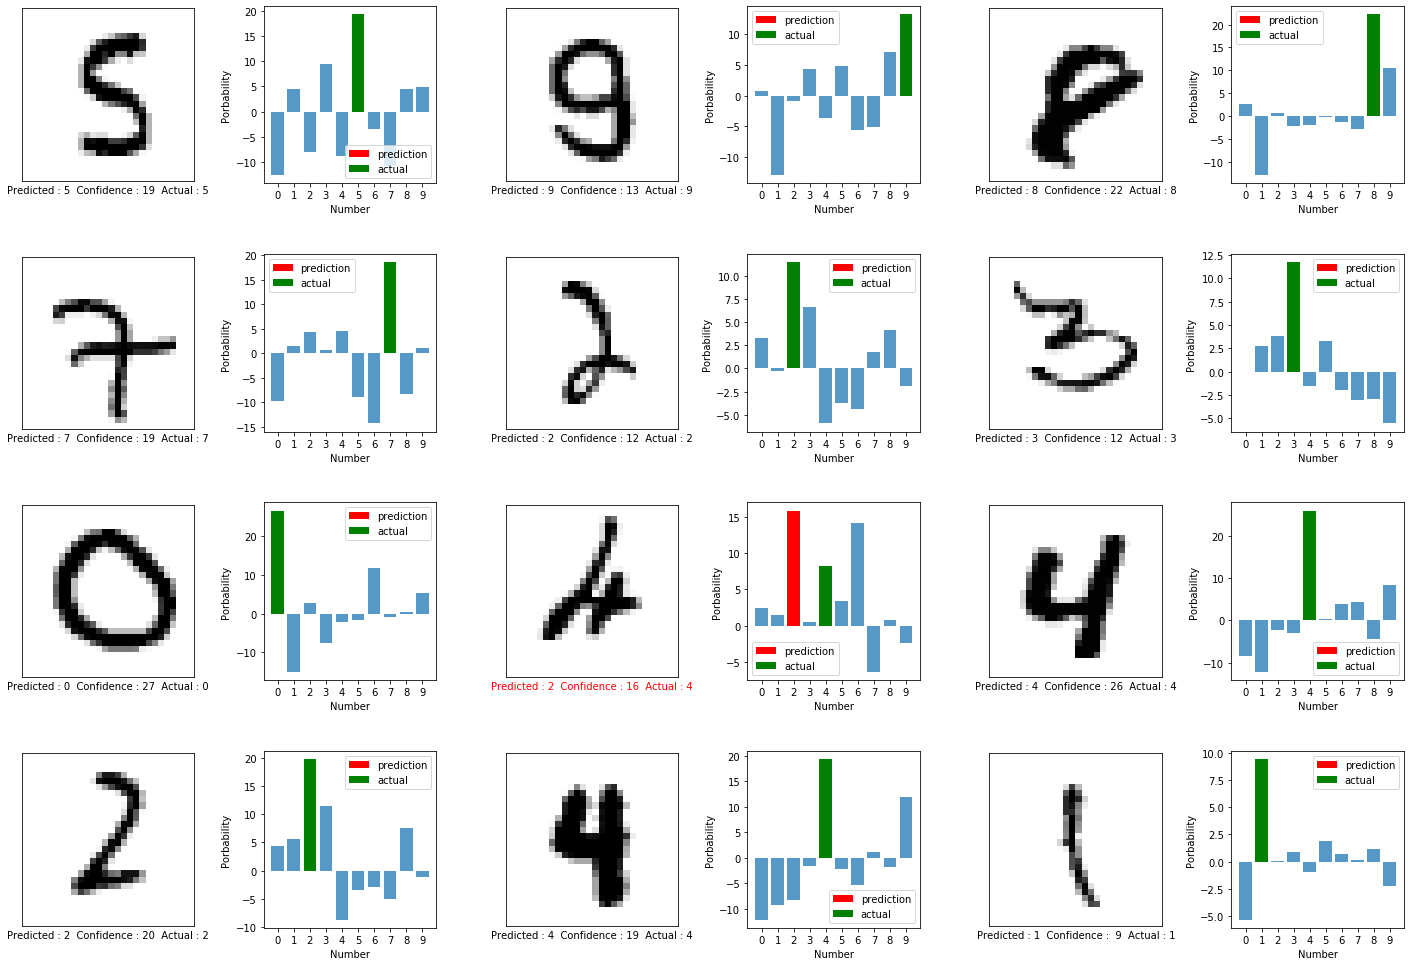

In [48]:
graph_predictions(test_X, test_y, all_predictions, start=240, rows=4, cols=3, zoom=4)

## Save the Model

In [50]:
model.save('HandWriting_model.h5')